<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://github.com/GustavoHDLC1/Colab_Files_PADP/blob/main/practicasregresionlasso_ridge.ipynb)

### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="whitegrid")

In [3]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

In [4]:
ruta = '/content/drive/MyDrive/MIAAD/PADP/insurance.csv'
df = pd.read_csv(ruta)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
var_num = ['age', 'bmi', 'children', 'charges']
var_cat = ['sex', 'smoker', 'region']

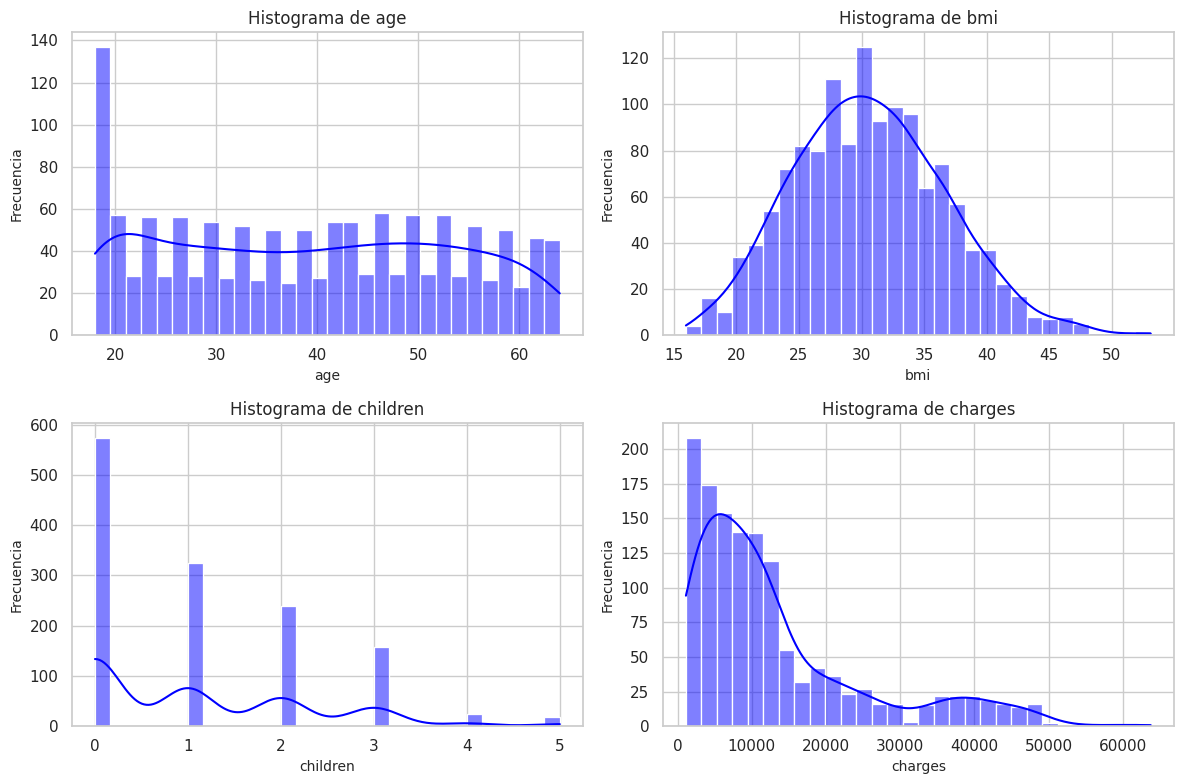

In [8]:

columns = var_num
n = len(columns)
rows = math.ceil(n / 2)  # 3 columnas por fila
plt.figure(figsize=(12, 4*rows))
for i, col in enumerate(columns, 1):
    plt.subplot(rows, 2, i)  # Ajustar la cantidad de subgráficos según el número de columnas
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Histograma de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)

plt.tight_layout()
plt.show()

De las variables nnuméricas, solo la variable bmi parece seguir una distribución normal, en el caso de la edad, vemos una carga al inicio y en el resto parece intermitente entre dos puntos, para la variable de número de hijos disminuye gradualmente, y para los cargos que es la variable objetivo, vemos como se carga a la izquierda.

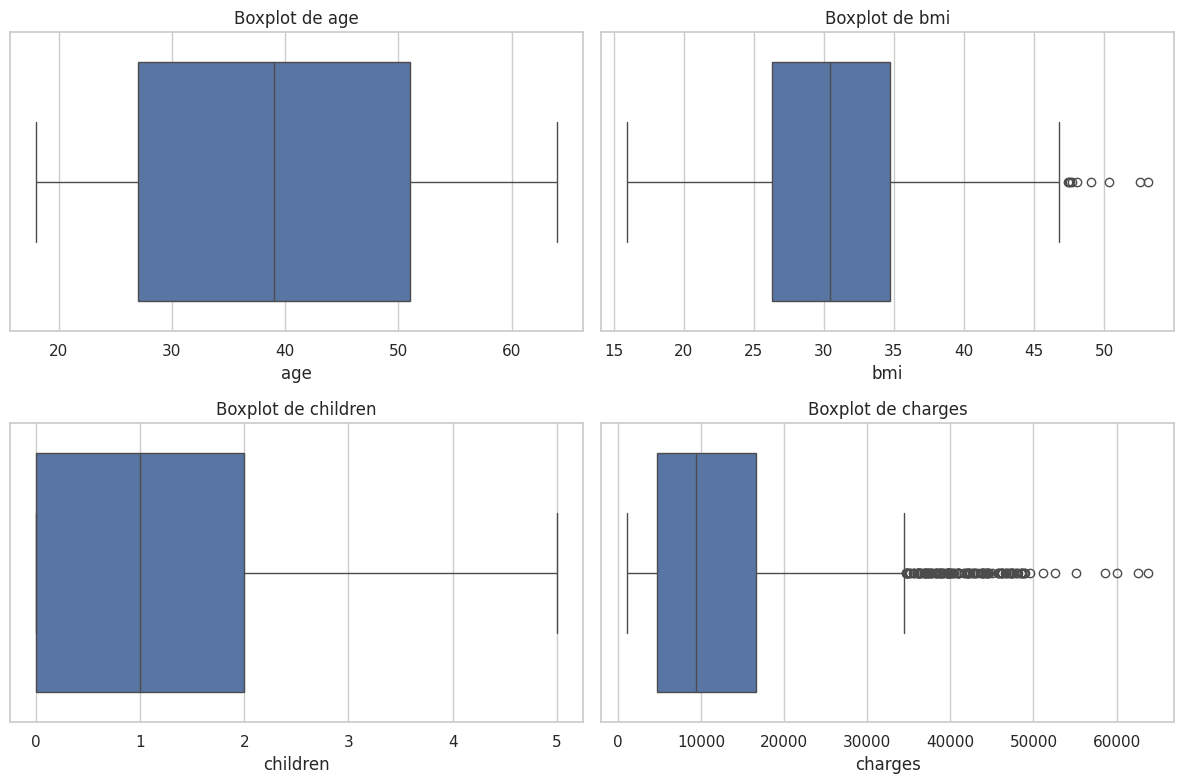

In [9]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 4*2))
# Crear boxplots para cada columna numérica
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # n filas, 3 columnas de subplots
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Solo se observan outliers en la variable bmi, a parte de la target, pero se decide no eliminarlos

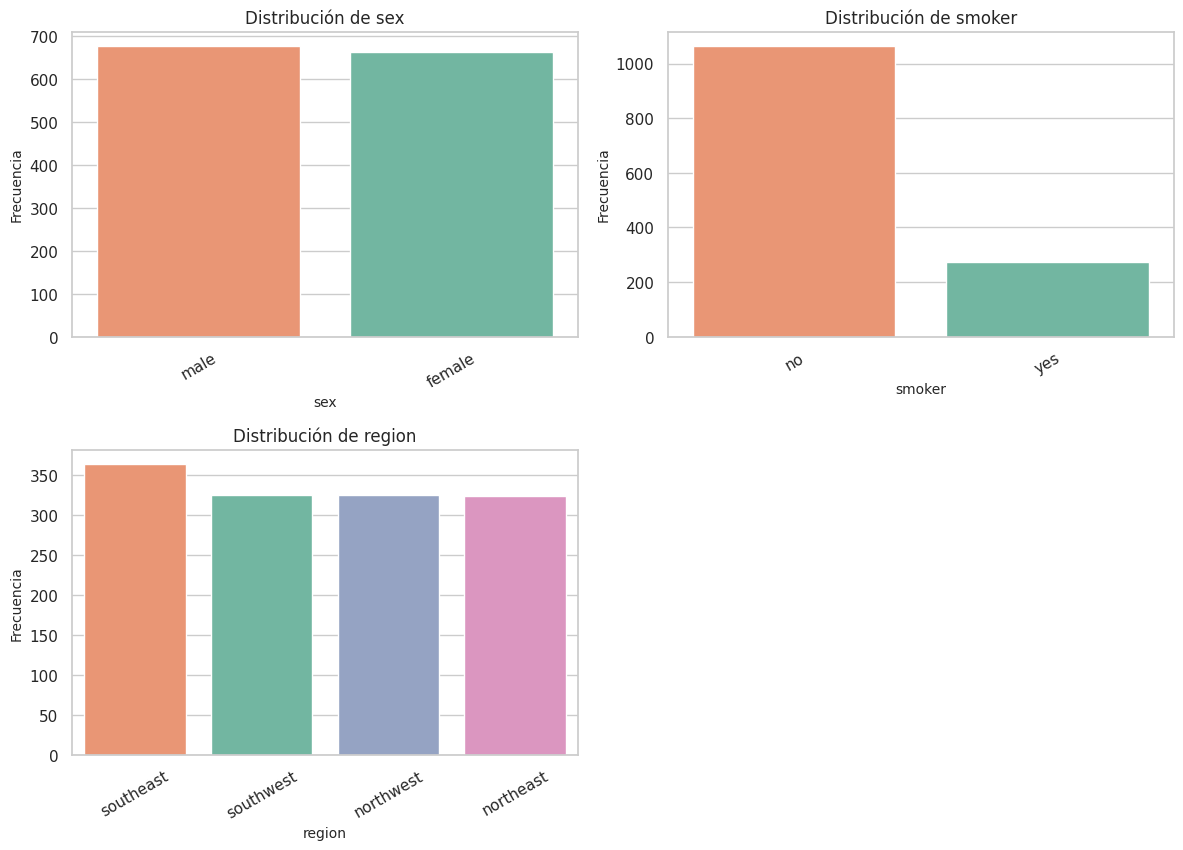

In [10]:
# Crear gráficos de barras
plt.figure(figsize=(12, 4*3))

for i, col in enumerate(var_cat, 1):
    plt.subplot(3, 2, i)  # un gráfico por fila
    sns.countplot(data=df, x=col, hue=col, palette="Set2", order=df[col].value_counts().index)

    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    plt.xticks(rotation=30)  # rotar etiquetas si son largas

plt.tight_layout()
plt.show()

Para las variables de región y sexo, tenemos muestras balanceadas, sin embargo, para la variable smoker predomina la clase "no"

In [11]:
# Calcular la matriz de correlación
corr_matrix = df[var_num].corr()
# Mostrar la matriz de correlación
print("Matriz de correlación:")
corr_matrix

Matriz de correlación:


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


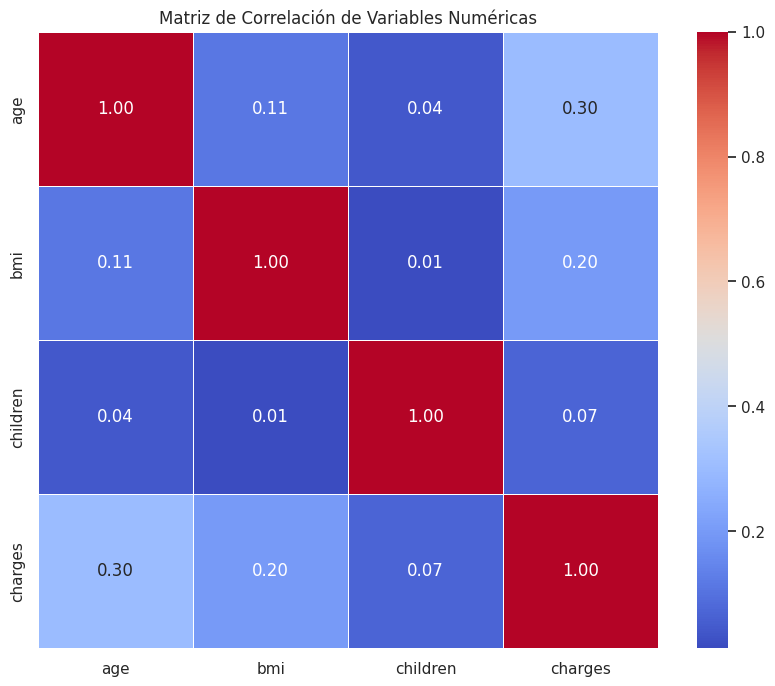

In [12]:
# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


En general no se observan correlaciones significativas, las mas relevantes son las de los cargos que es la target con las variables de edad y bmi, que tampoco superan el 0.5 por lo que no muestran una relación fuerte

In [13]:
cols_num = ['age', 'bmi', 'children']

In [14]:
# Crear un preprocesador para escalar las variables numéricas y codificar las categóricas
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), cols_num),  # Normaliza las variables numéricas
    ("cat", OneHotEncoder(drop='first'), var_cat)  # Convierte categóricas a variables dummy
])

In [15]:
# Definir el parámetro de regularización (alpha)
# Se puede ajustar con validación cruzada para optimizar el rendimiento
alpha = 0.1  # Controla la penalización sobre los coeficientes

# Crear un pipeline que primero preprocesa los datos y luego aplica regresión Lasso
lasso = Pipeline([
    ("preprocessor", preprocessor),
    ("lasso", Lasso(alpha=alpha))
])

In [16]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [17]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns='charges')
y = df['charges']
# Entrenar el modelo Lasso con los datos
lasso.fit(X, y)

# Obtener los coeficientes después del ajuste
feature_names = cols_num + list(lasso.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(lasso.named_steps["lasso"].coef_, index=feature_names)
print(coef)

age                  3607.401538
bmi                  2067.477362
children              572.886518
sex_male             -130.858174
smoker_yes          23847.874359
region_northwest     -351.296712
region_southeast    -1033.232029
region_southwest     -958.345589
dtype: float64


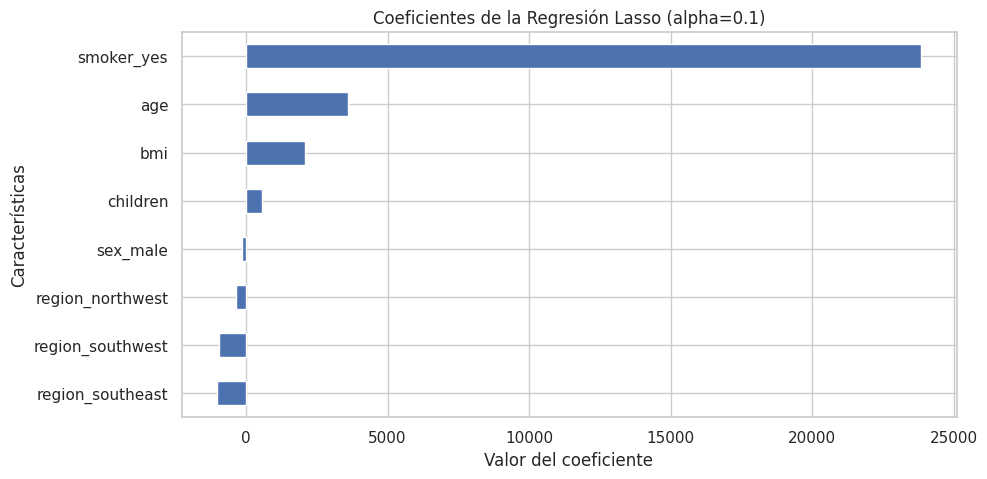

In [18]:
# Graficar los coeficientes de la regresión Lasso
plt.figure(figsize=(10, 5))
coef.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Lasso (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

In [19]:
# Obtener la matriz transformada
X_transformed = preprocessor.transform(X)

# Obtener los nombres de las columnas después de la transformación
column_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)

X_transformed_df.head()


,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-1.438764,-0.453320,-0.908614,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0,0.0,0.0


### Análisis de Multicolinealidad ###
                Variable       VIF
0               num__age  1.015843
1               num__bmi  1.088673
2          num__children  1.003348
3          cat__sex_male  1.674830
4        cat__smoker_yes  1.228075
5  cat__region_northwest  1.223453
6  cat__region_southeast  1.357419
7  cat__region_southwest  1.215686




/tmp/ipython-input-1705232407.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


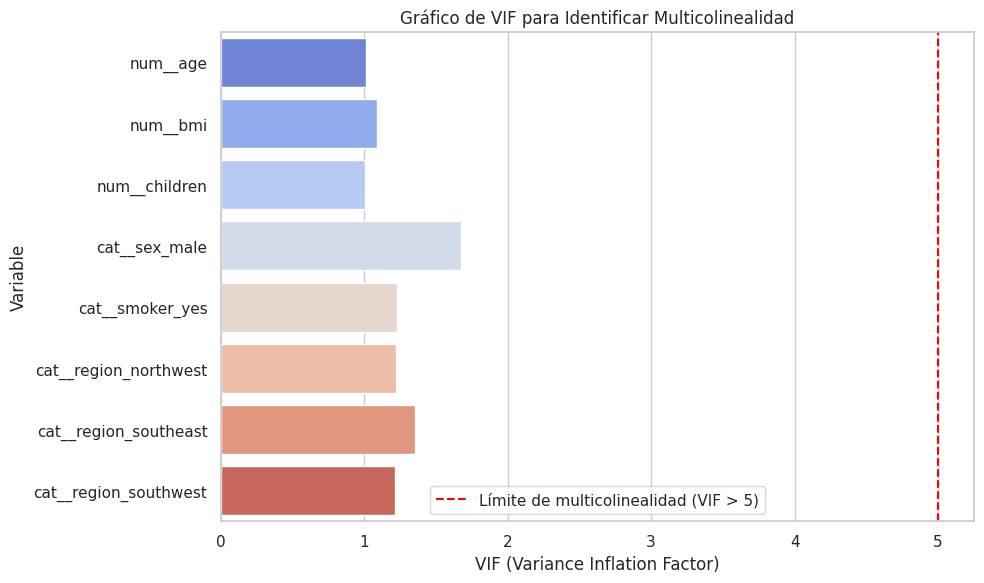

In [20]:
#Multicolinealidad
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.
# Agregar constante para calcular el VIF
#X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X_transformed_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_transformed_df.values, i) for i in range(X_transformed_df.shape[1])]

print("### Análisis de Multicolinealidad ###")
print(vif_data)
print('\n')

# 7. Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Evaluación del modelo con métricas de desempeño
y_pred = lasso.predict(X)
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

In [22]:
# Imprimir los resultados de las métricas
print("Evaluación del modelo Lasso:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Lasso:
MSE: 36501893.68
RMSE: 6041.68
MAE: 4170.90
R^2: 0.7509
Número de coeficientes no nulos: 8


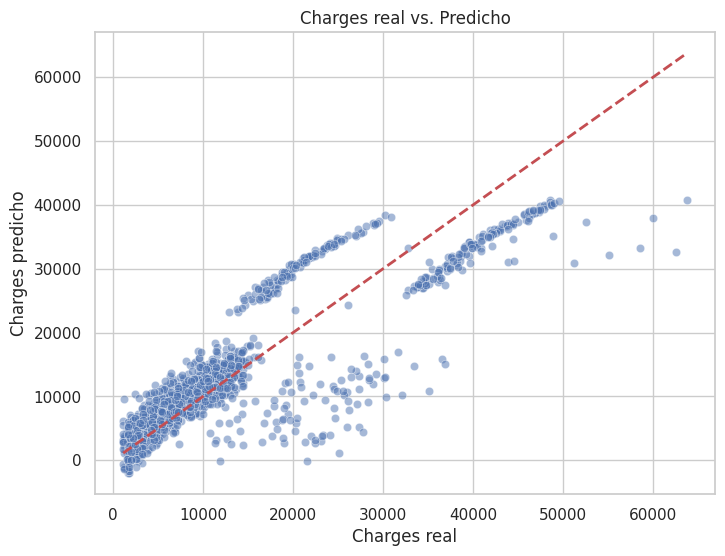

In [23]:
# Gráfico de dispersión: Charges real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Charges real")
plt.ylabel("Charges predicho")
plt.title("Charges real vs. Predicho")
plt.show()

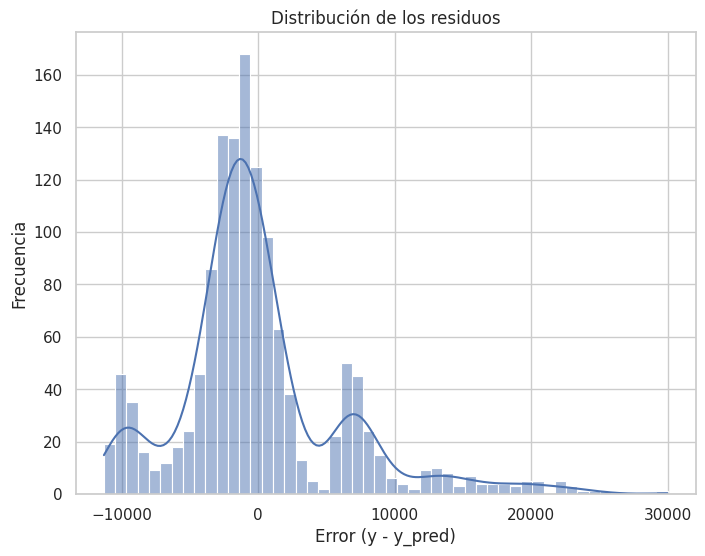

In [24]:
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

In [25]:
# Función para graficar QQ-Plot
def qqplot(data, column_name):
    plt.figure(figsize=(12, 5))

    # QQ-Plot
    #plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

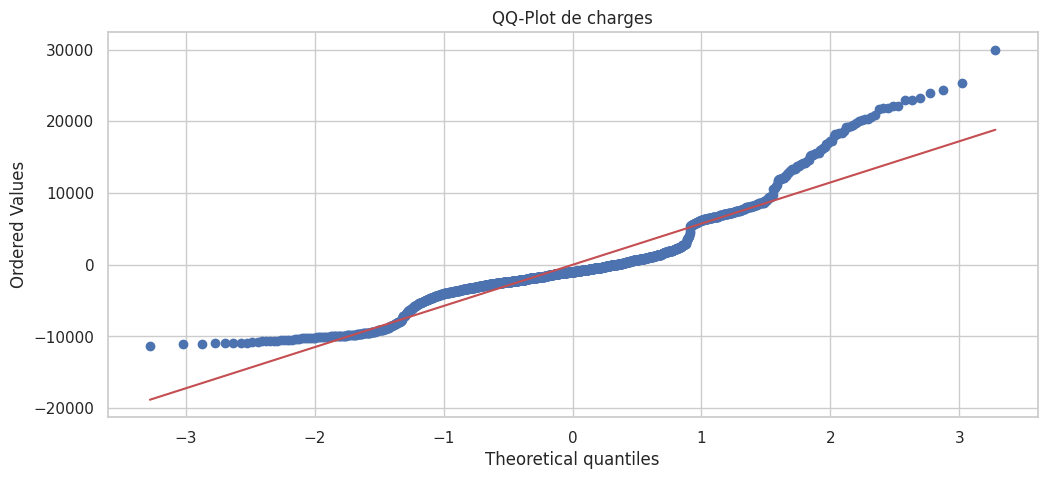

In [26]:
qqplot(residuals, 'charges')

In [27]:
normality_tests(residuals, 'charges')


Pruebas de normalidad para la columna: charges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 44.87138
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


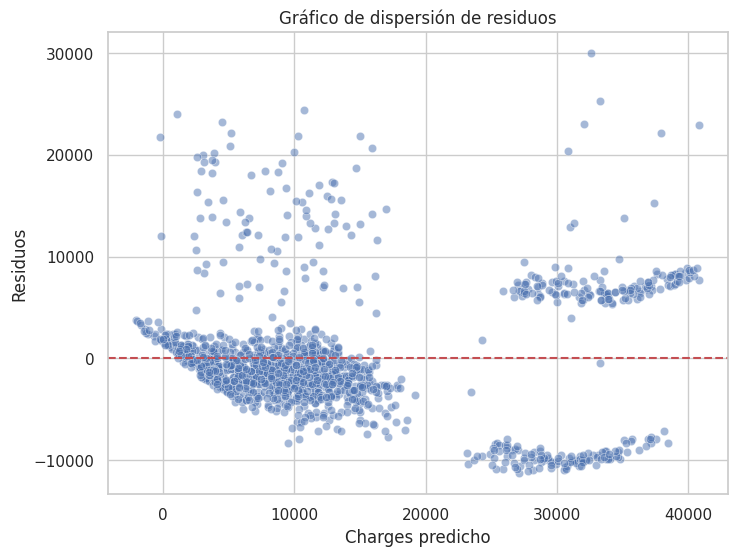

In [28]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

Ridge

In [29]:
# Definir un valor fijo de alpha
alpha = 1  # Se puede ajustar manualmente según necesidad

# Crear un pipeline con Ridge
ridge = Pipeline([
    ("preprocessor", preprocessor),
    ("ridge", Ridge(alpha=alpha))
])

In [30]:
# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns='charges')
y = df['charges']

# Entrenar el modelo Ridge
ridge.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('ridge', Ridge(alpha=1))])

In [31]:
# Obtener los coeficientes después del ajuste
feature_names = cols_num + list(ridge.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out())
coef = pd.Series(ridge.named_steps["ridge"].coef_, index=feature_names)
print(coef)

age                  3604.096982
bmi                  2064.858647
children              573.073125
sex_male             -124.200613
smoker_yes          23737.991359
region_northwest     -347.825073
region_southeast    -1018.540799
region_southwest     -952.384021
dtype: float64


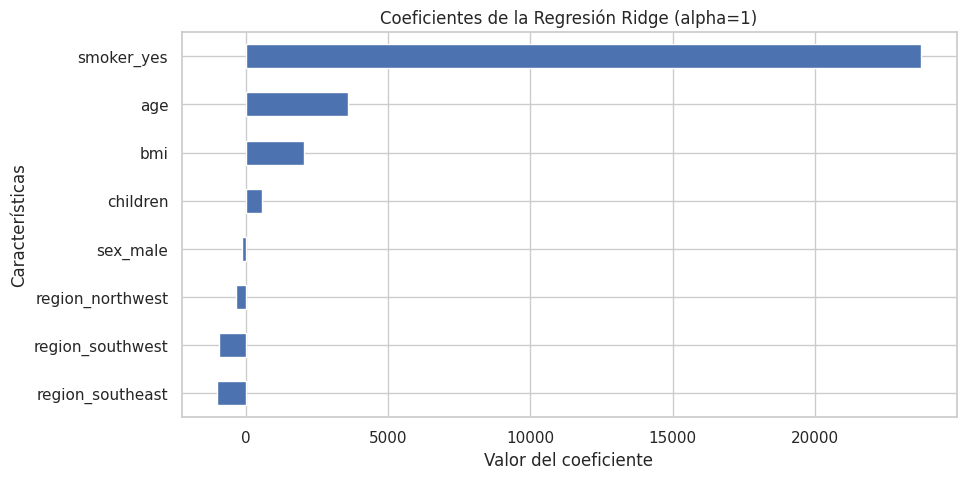

In [32]:
# Graficar los coeficientes de la regresión Ridge
plt.figure(figsize=(10, 5))
coef.sort_values().plot(kind="barh")
plt.title(f"Coeficientes de la Regresión Ridge (alpha={alpha})")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Características")
plt.show()

In [33]:
# Obtener la matriz transformada
X_transformed = preprocessor.transform(X)

# Obtener los nombres de las columnas después de la transformación
column_names = preprocessor.get_feature_names_out()

# Convertir a DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=column_names)

X_transformed_df.head()

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,-1.438764,-0.453320,-0.908614,0.0,1.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0,0.0,0.0


### Análisis de Multicolinealidad ###
                Variable       VIF
0               num__age  1.015843
1               num__bmi  1.088673
2          num__children  1.003348
3          cat__sex_male  1.674830
4        cat__smoker_yes  1.228075
5  cat__region_northwest  1.223453
6  cat__region_southeast  1.357419
7  cat__region_southwest  1.215686




/tmp/ipython-input-1705232407.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


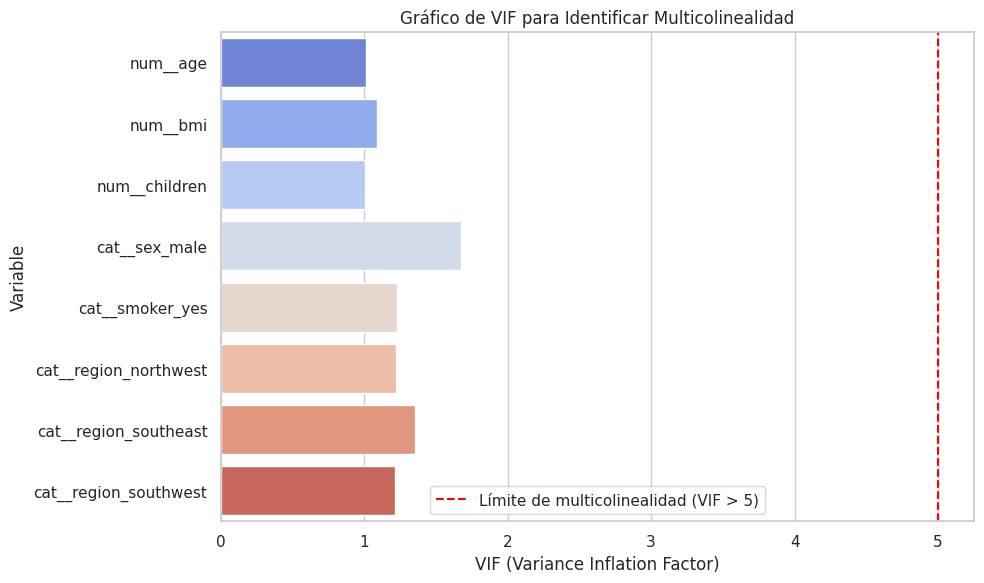

In [34]:
#Multicolinealidad
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.
# Agregar constante para calcular el VIF
#X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X_transformed_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_transformed_df.values, i) for i in range(X_transformed_df.shape[1])]

print("### Análisis de Multicolinealidad ###")
print(vif_data)
print('\n')

# 7. Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# Evaluación del modelo con métricas de desempeño
y_pred = ridge.predict(X)

MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación
n_nonzero_coef = np.sum(coef != 0)  # Número de coeficientes distintos de cero

# Imprimir los resultados de las métricas
print("Evaluación del modelo Ridge:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")
print(f"Número de coeficientes no nulos: {n_nonzero_coef}")

Evaluación del modelo Ridge:
MSE: 36503887.63
RMSE: 6041.84
MAE: 4178.37
R^2: 0.7509
Número de coeficientes no nulos: 8


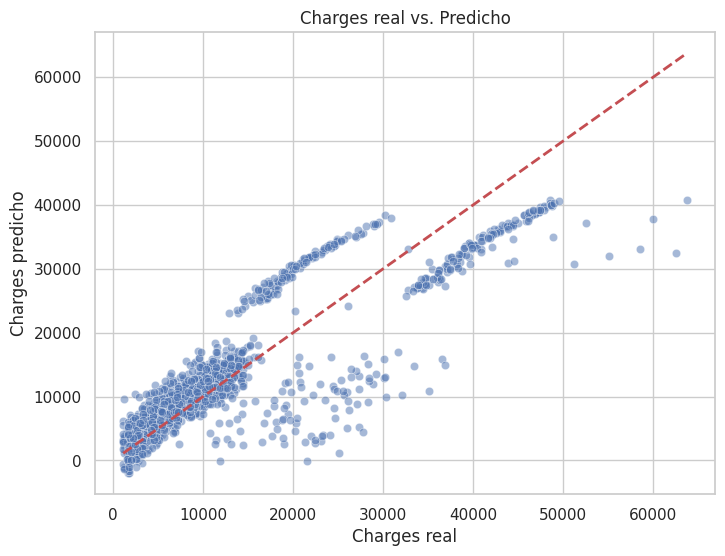

In [36]:
# Gráfico de dispersión: Charges real vs. Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel("Charges real")
plt.ylabel("Charges predicho")
plt.title("Charges real vs. Predicho")
plt.show()

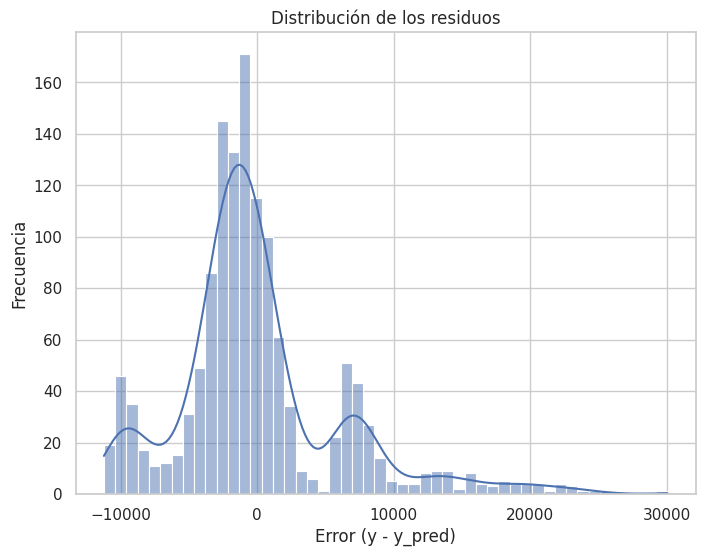

In [37]:
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

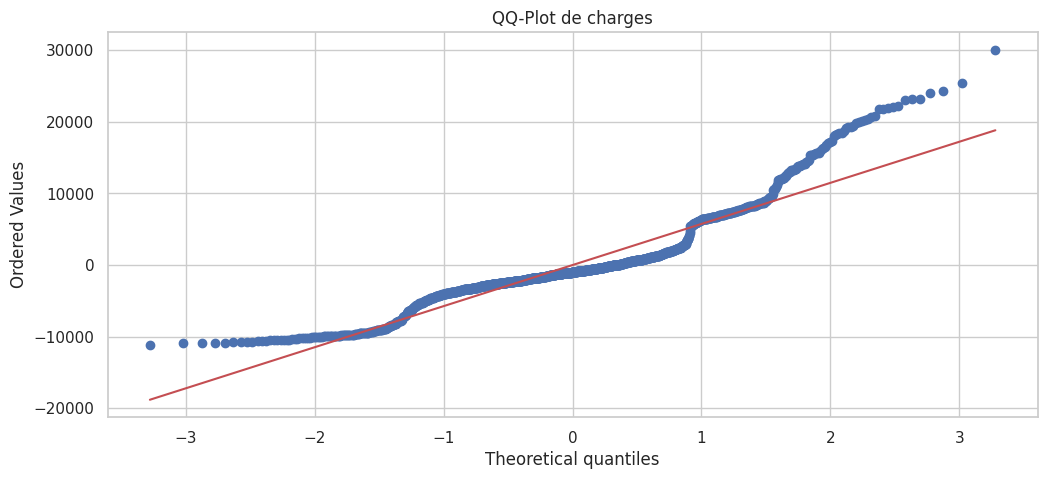

In [38]:
qqplot(residuals, 'charges')

In [39]:
normality_tests(residuals, 'charges')


Pruebas de normalidad para la columna: charges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 45.40771
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


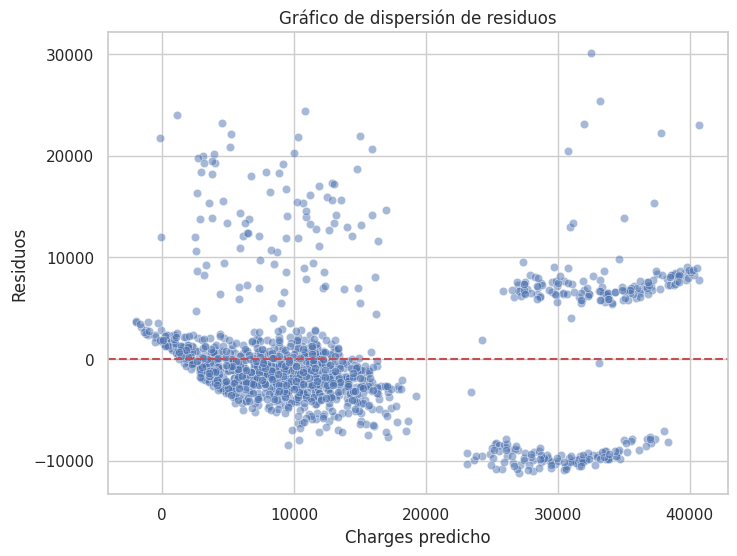

In [40]:
# Gráfico de dispersión de residuos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Charges predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

### ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?
El valor es prácticamente el mismo, esto puede deberse a los valores de alpha que se usaron en cada caso, ya que al modelo Lasso se le asignó un valor de 0.1, es decir, una penalización muy pequeña, por lo que no castiga tanto los coeficientes y esto genera que dificilmente se hagan cero, por otro lado, se usó alpha igual a 1 para el modelo ridge, que no vuelve ceros los coeficientes, pero si aplica una mayor penalización a los coeficientes ya que el valor de alpha es muy alto, de este modo, fue casi como aplicar el mismo modelo en ambos casos.

### ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?
Ninguna tiene un valor cercano a cero, el coeficiente mas bajo en valor absoluto es el de la variable sex_male, que vale -138.85, esto significa que todas las variables aportan información relevante al modelo, y dado los alpha utilizados, no se penaliza tanto los coeficientes de las variables

### ¿Se cumplen los supuestos en ambos modelos?
En general no, en ambos casos se tienen resultados similares, en el caso del VIF, si se tienen los valores deseados, ya que en todos las variables el VIF es cercano a 1, lo cuál es el escenario ideal dónde no existe colinealidad. Dado el histograma y el QQ-Plot de los residuos, se aprecia que no sigue una distribución normal, lo que se confirma al aplicar algunas pruebas de normalidad como la de Shapiro-Wilk, por último vemos que existe heterocedasticidad, es decir, la varianza de los residuos no es constante, se observan cumulos en ciertas regiones y varios puntos dispersos.

### Si hay heterocedasticidad, ¿cómo podría solucionarse?
En este caso podrían intentar eliminarse los outliers en la columna bmi que fueron detectados, pero la mejor solución sería implementar otro modelo, ya que al comparar los valores reales contra las predicciones se observa que no hay una recta que ajuste bien a los datos, ya que la manera en que se dispersan no siguen una función lineal

### ¿Qué modelo es más interpretable?
Básicamente se tienen los mismos resultados, por lo que es indiferente, ambos tienen coeficientes similares en las variables

### ¿Cuál reduce mejor el sobreajuste?
Es el mismo caso que en la pregunta anterior, los resultados son muy similares como para determinar que uno sea mejor que el otro

### ¿Qué variables son más importantes en cada caso?
En ambos casos las variables mas importantes son la edad, el bmi y la variable que indica si es fumador o no, lo cual hace todo el sentido del mundo de acuerdo al contexto del problema, sabemos que se trata de predecir cargos de un seguro médico, así que es normal que aquellas personas de mayor riesgo tengan que pagar más, y estás variables podrían describir ese riesgo, por ejemplo, una persona de edad más avanzada es más propensa a necesitar el seguro que una joven, el bmi es un indicador sobre la relación entre el peso y la altura de la persona, lo que igual sirve para determinar posibles enfermedades cardiovasculares, por último, la más obvia es el indicador de si fuma o no, ya que tener ese hábito es un gran daño a la salud.